<a href="https://colab.research.google.com/github/giacomosansoni/Siamese_Network_Artist_Similarity/blob/main/Bert_SBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###BERT WORD EMBEDDINGS

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

# Put the model in evaluation mode, meaning feed-forward operation
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:<12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:<12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:<12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 199 different named parameters.

==== Embedding Layer ====

embeddings.word_embeddings.weight                       (30522, 768)
embeddings.position_embeddings.weight                   (512, 768)  
embeddings.token_type_embeddings.weight                 (2, 768)    
embeddings.LayerNorm.weight                             (768,)      
embeddings.LayerNorm.bias                               (768,)      

==== First Transformer ====

encoder.layer.0.attention.self.query.weight             (768, 768)  
encoder.layer.0.attention.self.query.bias               (768,)      
encoder.layer.0.attention.self.key.weight               (768, 768)  
encoder.layer.0.attention.self.key.bias                 (768,)      
encoder.layer.0.attention.self.value.weight             (768, 768)  
encoder.layer.0.attention.self.value.bias               (768,)      
encoder.layer.0.attention.output.dense.weight           (768, 768)  
encoder.layer.0.attention.output.dense.bias             (768,) 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Construct a BERT tokenizer, based on WordPiece

text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"
# Tokenize our sentence with the BERT tokenizer
tokenized_text = tokenizer.tokenize(marked_text) #print out the tokens
print(tokenized_text)

''' the word embedding is not recognized so it is written down in 4 pieces/tokens'''

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


' the word embedding is not recognized so it is written down in 4 pieces/tokens'

In [ ]:
#Map the token strings to their vocabulary indexes
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

#Display the words with their indeces
for tup in zip(tokenized_text, indexed_tokens):
  print('{:<12} {:>6,}'.format(tup[0], tup[1])) # sizes details

[CLS]           101
here          2,182
is            2,003
the           1,996
sentence      6,251
i             1,045
want          2,215
em            7,861
##bed         8,270
##ding        4,667
##s           2,015
for           2,005
.             1,012
[SEP]           102


In [ ]:
# Mark every token as belonging to the sentence "1"
segments_ids = [1] * len(tokenized_text)
print(segments_ids)

#Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens]) # inputs ids
segments_tensors = torch.tensor([segments_ids]) # attention mask

print(segments_tensors)
print(tokens_tensor)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
tensor([[ 101, 2182, 2003, 1996, 6251, 1045, 2215, 7861, 8270, 4667, 2015, 2005,
         1012,  102]])


In [ ]:
# Run the text through Bert and collect all of the hidden states produced from all 12 layers

with torch.no_grad():
  outputs = model(tokens_tensor, segments_tensors)
  #because we set 'output_hidden_states = True', the third item will be the hidden states from all layers

outputs.keys() # check that the thirs item will be the hidden states from all layers

# The pooler_output is the output of a pooling operation that converts the last_hidden_state tensor into a fixed size representation. Often used for classification tasks.
# In the original BERT model, it's the output of applying a dense layer and a tanh activation function on the hidden state corresponding to the [CLS] token, which is supposed to aggregate the content of the entire sequence.

odict_keys(['last_hidden_state', 'pooler_output', 'hidden_states'])

In [ ]:
# hidden_states: This key contains the hidden states from all layers in the BERT model, not just the final layer. This means you get a tuple of tensors, where each tensor corresponds to the hidden states of one layer for all tokens in the sequence
BERT_hidden_states = outputs[2] # or BERT_hidden_states = outputs.hidden_states
BERT_hidden_states

(tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
          [-0.3557,  0.9575, -1.3448,  ...,  0.5972,  0.7392,  0.2581],
          [-0.6270, -0.0633, -0.3143,  ...,  0.3427,  0.4636,  0.4594],
          ...,
          [-0.1977,  0.5124, -0.7430,  ...,  0.4438,  0.7002,  0.6790],
          [-0.4543,  0.4021,  0.0275,  ...,  0.4682,  0.4795,  0.7025],
          [-0.6056,  0.0968,  0.1880,  ..., -0.2773,  0.1849,  0.0580]]]),
 tensor([[[ 0.0212,  0.0978, -0.2176,  ...,  0.2098, -0.0370,  0.0035],
          [-0.6961,  1.1623, -1.4048,  ...,  0.3229,  0.8464,  0.4431],
          [-0.9514, -0.4736, -0.4308,  ...,  0.2475,  0.6113,  0.4343],
          ...,
          [ 0.4304,  0.4929, -0.6780,  ...,  0.1534,  0.7755,  0.3170],
          [-0.4537,  0.2565,  0.0719,  ...,  0.3848,  0.0583,  0.4297],
          [-0.4741,  0.0288,  0.0707,  ..., -0.1558,  0.1840,  0.1237]]]),
 tensor([[[-0.1364, -0.2169, -0.3929,  ...,  0.4501,  0.0688, -0.0071],
          [-0.7417,  1.7412,

pooler_output contains a "representation" of each sequence in the batch, and is of size (batch_size, hidden_size). What it basically does is take the hidden representation of the [CLS] token of each sequence in the batch (which is a vector of size hidden_size), and then run that through the BertPooler.nn.Module. This consists of a linear layer followed by a Tanh activation function.

https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/


hidden_states has four dimensions, in the following order:

The layer number (13 layers): 13 because the first element is the input embeddings, the rest is the output of each Bert Layer.
The batch number (1 sentence)
The word / token number (14 tokens in our sentence)
The hidden unit / feature number (768 features)

That's 219,648 unique values just to represent our one sentence!



In [ ]:
# CHECK:

print("Number of layers:", len(BERT_hidden_states), " (initial embeddings + 12 BERT layers)")
layer_i = 0

print("Number of batches:", len(BERT_hidden_states[layer_i]))
batch_i = 0

print("Number of tokens:", len(BERT_hidden_states[layer_i][batch_i]))
token_i = 0

print("Number of hidden units:", len(BERT_hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13  (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 14
Number of hidden units: 768


WORD Vectors

We would like to get individual vectors for each of our tokens, but for each token of our input we have 13 separate vectors each of length 768.

In order to get the individual vectors we will need to combine some of the layer vectors...but which layer or combination of layers provides the best representation?

Let's create word vectors two ways.

First, let's concatenate the last four layers, giving us a single word vector per token. Each vector will have length 4 x 768 = 3072.



In [ ]:
# Let’s combine the layers to make this one whole big tensor.

# Concatenate the tensors for all layers. We use 'stack' here to
# create a new dimension in the tensor.

token_embeddings = torch.stack(BERT_hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 14, 768])

In [ ]:
#Remove dimension 1, the "batches"
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 14, 768])

In [ ]:
# Swap dimensions 0and 1
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([14, 13, 768])

In [ ]:
# Store the token vectors, with shape [14 x 3072]
token_vecs_cat = []

# token embeddings is a [14 x 13 x 768] tensor
for token in token_embeddings:
  #concatenate the vectors
  cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim = 0)
  #use 'cat_vec' to represent 'token'
  token_vecs_cat.append(cat_vec)

print('Shape is: %d x %d' %(len(token_vecs_cat), len(token_vecs_cat[0])))
# for every word/token we have a vector with 3072 dimensions.

Shape is: 14 x 3072


WORD Embedding by adding last four Layers



In [ ]:
# Stores the token vectors, with shape [14 x 768]
token_vecs_sum = []

# 'token_embeddings' is a [14 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
  # 'token' is a [12 x 768] tensor! Sum the vectors from the last four layers.
  sum_vec = torch.sum(token[-4:], dim=0)
  # Use 'sum_vec' to represent 'token'.
  token_vecs_sum.append(sum_vec)

print('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
# for every word/token we have a vector with 768 dimensions.

Shape is: 14 x 768


SENTENCE VECTORS

To get a single vector for our entire sentence we have multiple application-dependent strategies, but a simple approach is to average the second to last hidden layer of each token producing a single 768 length vector.

Second to last hidden layer



In [ ]:
# 'BERT_hidden_states' has shape [13 x 1 x 14 x 768]
# 'token_vecs' is a tensor with shape [14 x 768]
token_vecs = BERT_hidden_states[-2][0]
print('token_vecs.shape: ', token_vecs.shape)

# Calculate the average of all 14 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

print("Our final sentence embedding vector of shape:", sentence_embedding.size())

token_vecs.shape:  torch.Size([14, 768])
Our final sentence embedding vector of shape: torch.Size([768])


CLS Token Embedding

In [ ]:
lhs_tensor = outputs.last_hidden_state
print(lhs_tensor.size())
cls_tensor = lhs_tensor[:, 0, :]
cls_tensor.shape

torch.Size([1, 14, 768])


torch.Size([1, 768])

###BERT SENTENCEC VECTORS FOR A PARAGRAPH

In [ ]:
import torch
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from transformers import BertTokenizer, BertModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
huggingface_model = 'bert-base-uncased'
model = BertModel.from_pretrained(huggingface_model)
tokenizer = BertTokenizer.from_pretrained(huggingface_model)

inflation = """In economics, inflation is a general increase in the prices of goods and services in an economy. This is usually measured using the consumer price index (CPI). When the general price level rises, each unit of currency buys fewer goods and services; consequently, inflation corresponds to a reduction in the purchasing power of money. The opposite of CPI inflation is deflation, a decrease in the general price level of goods and services. The common measure of inflation is the inflation rate, the annualized percentage change in a general price index. As prices faced by households do not all increase at the same rate, the consumer price index (CPI) is often used for this purpose."""
space = """ Space is a three-dimensional continuum containing positions and directions. In classical physics, physical space is often conceived in three linear dimensions. Modern physicists usually consider it, with time, to be part of a boundless four-dimensional continuum known as spacetime. The concept of space is considered to be of fundamental importance to an understanding of the physical universe. However, disagreement continues between philosophers over whether it is itself an entity, a relationship between entities, or part of a conceptual framework."""
medicine = """ Medicine is the science and practice of caring for a patient, managing the diagnosis, prognosis, prevention, treatment, palliation of their injury or disease, and promoting their health. Medicine encompasses a variety of health care practices evolved to maintain and restore health by the prevention and treatment of illness. Contemporary medicine applies biomedical sciences, biomedical research, genetics, and medical technology to diagnose, treat, and prevent injury and disease, typically through pharmaceuticals or surgery, but also through therapies as diverse as psychotherapy, external splints and traction, medical devices, biologics, and ionizing radiation, amongst others."""
paragraph = inflation + space + medicine
sentences = sent_tokenize(paragraph) # split the  in sentences
len(sentences)

14

In [ ]:
sentences

['In economics, inflation is a general increase in the prices of goods and services in an economy.',
 'This is usually measured using the consumer price index (CPI).',
 'When the general price level rises, each unit of currency buys fewer goods and services; consequently, inflation corresponds to a reduction in the purchasing power of money.',
 'The opposite of CPI inflation is deflation, a decrease in the general price level of goods and services.',
 'The common measure of inflation is the inflation rate, the annualized percentage change in a general price index.',
 'As prices faced by households do not all increase at the same rate, the consumer price index (CPI) is often used for this purpose.',
 'Space is a three-dimensional continuum containing positions and directions.',
 'In classical physics, physical space is often conceived in three linear dimensions.',
 'Modern physicists usually consider it, with time, to be part of a boundless four-dimensional continuum known as spacetime.

In [ ]:
sentences[0]

'In economics, inflation is a general increase in the prices of goods and services in an economy.'

In [ ]:
len(sentences)

14

In [ ]:
# original sentence
print(' Original: ', sentences[0])
# Sentence split into tokens
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
# Print the sentence mapped to token ids
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  In economics, inflation is a general increase in the prices of goods and services in an economy.
Tokenized:  ['in', 'economics', ',', 'inflation', 'is', 'a', 'general', 'increase', 'in', 'the', 'prices', 'of', 'goods', 'and', 'services', 'in', 'an', 'economy', '.']
Token IDs:  [1999, 5543, 1010, 14200, 2003, 1037, 2236, 3623, 1999, 1996, 7597, 1997, 5350, 1998, 2578, 1999, 2019, 4610, 1012]


BERT base has two constraints:
- All sentences must be padded or truncated to a single, fixed length.
- The maximum sentence length is 512 tokens.

The tokenizer.encode_plus function combines multiple steps for us:
- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.
- Pad or truncate all sentences to the same length.
- Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.


In [ ]:
# Maximum token length
max_len = 0

for sent in sentences:

  #Tokenize the text and add '[CLS]' and '[SEP]' tokens.
  input_ids = tokenizer.encode(sent, add_special_tokens = True)

  #Update the maximum sentence length
  max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  69


In [ ]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add `[CLS]` and `[SEP]`
                        max_length = max_len,      # Pad & truncate all sentences.
                        pad_to_max_length = True,  # Pad sentence to max_length
                        return_attention_mask = True,   # Construct attention masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # Add its attention mask (simply differenciates padding from non-padding)
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors
inputs_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Print sentence 0, now as a list of IDs
print('Original first sentence: \n', sentences[0])
print('\nToken IDs view:', input_ids[0])

Original first sentence: 
 In economics, inflation is a general increase in the prices of goods and services in an economy.

Token IDs view: tensor([[  101,  1999,  5543,  1010, 14200,  2003,  1037,  2236,  3623,  1999,
          1996,  7597,  1997,  5350,  1998,  2578,  1999,  2019,  4610,  1012,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:<12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:<12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:<12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 199 different named parameters.

==== Embedding Layer ====

embeddings.word_embeddings.weight                       (30522, 768)
embeddings.position_embeddings.weight                   (512, 768)  
embeddings.token_type_embeddings.weight                 (2, 768)    
embeddings.LayerNorm.weight                             (768,)      
embeddings.LayerNorm.bias                               (768,)      

==== First Transformer ====

encoder.layer.0.attention.self.query.weight             (768, 768)  
encoder.layer.0.attention.self.query.bias               (768,)      
encoder.layer.0.attention.self.key.weight               (768, 768)  
encoder.layer.0.attention.self.key.bias                 (768,)      
encoder.layer.0.attention.self.value.weight             (768, 768)  
encoder.layer.0.attention.self.value.bias               (768,)      
encoder.layer.0.attention.output.dense.weight           (768, 768)  
encoder.layer.0.attention.output.dense.bias             (768,) 

In [ ]:
with torch.no_grad():
    output = model(inputs_ids, attention_mask = attention_masks)

Recall earlier that he was something to say about the [CLS] tokens used for start sentence embedding. So after you pass through the BERT model, this becomes the tensor position [0] and has hidden dimensions of 768.
The BERT uses this token to represent sentence information. In other words, the semantic information of the whole sentence should be embedded in this 768 feature dimension. In fact, the BERT sentence classification only use this dimension of the tensor for subsequent classification task.


In [ ]:
# sentence_features = output[0][:,0,:].detach().numpy()
# remember: output[0] is last hidden state of encoder stack
# alternative output.last_hidden_state

my_last_hidden_BERT_states = output.last_hidden_state
print(my_last_hidden_BERT_states.size())
CLS_embedded_token_of_each_sentence = my_last_hidden_BERT_states[:,0,:]
CLS_embedded_token_of_each_sentence.size()
# [all sentences, 0 = CLS token only, all hidden outputs]

torch.Size([14, 69, 768])


torch.Size([14, 768])

In [ ]:
CLS_embedded_token_of_each_sentence_nparray = CLS_embedded_token_of_each_sentence.detach().numpy()
np.shape(CLS_embedded_token_of_each_sentence_nparray)

(14, 768)

Excellent Notebooks from the 2020s:
https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/


https://colab.research.google.com/github/VincentK1991/BERT_summarization_1/blob/master/notebook/Primer_to_BERT_extractive_summarization_March_25_2020.ipynb#scrollTo=nSiiJyfRf00


https://mccormickml.com/2019/07/22/BERT-fine-tuning/

### Visualization of Sentence Vectors from BERT


In [ ]:
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
array_similarity = squareform(pdist(CLS_embedded_token_of_each_sentence_nparray, metric='euclidean'))

Text(0.5, 1.0, 'visualizing sentence semantic similarity')

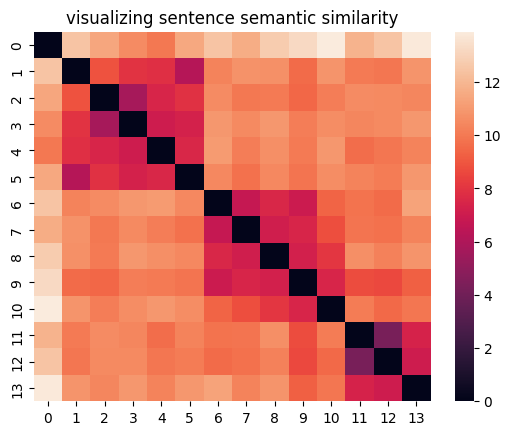

In [ ]:
sns.heatmap(array_similarity)
plt.title('visualizing sentence semantic similarity')

In [ ]:
pca = PCA(n_components=2)
pca.fit(CLS_embedded_token_of_each_sentence_nparray)

print(np.sum(pca.explained_variance_ratio_))

0.4586081


In [ ]:
pca_sentence_features = pca.transform(CLS_embedded_token_of_each_sentence_nparray)

pca_sentence_features

array([[ 5.4653316 , -1.6766675 ],
       [ 2.859726  ,  0.6001787 ],
       [ 3.2134657 , -0.76194036],
       [ 4.6243415 , -0.22986381],
       [ 4.1989937 ,  0.59619385],
       [ 3.5309436 , -0.34197614],
       [-3.417064  , -3.4435477 ],
       [-2.7495408 , -3.2594879 ],
       [-3.4571536 , -3.9290605 ],
       [-3.6675231 , -1.2318641 ],
       [-3.8239744 , -1.1914437 ],
       [-1.7995207 ,  4.836253  ],
       [-2.4104667 ,  4.7127557 ],
       [-2.5675573 ,  5.32047   ]], dtype=float32)

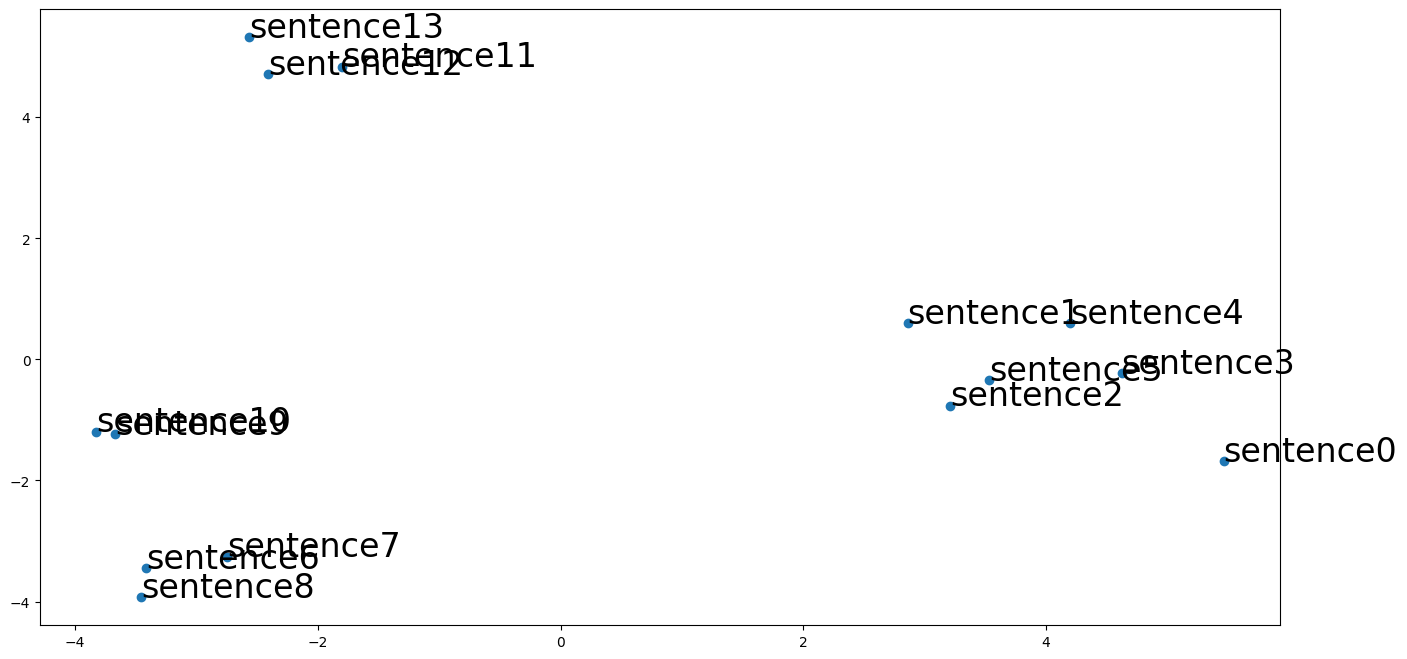

In [ ]:
plt.figure(figsize=(16,8))

# assuming a missing loop or comprehension here
plt.scatter(pca_sentence_features[:,0], pca_sentence_features[:,1])

# continuation of the assumed loop or comprehension
for idx, sentence in enumerate(sentences):
    plt.annotate('sentence' + str(idx), (pca_sentence_features[idx, 0], pca_sentence_features[idx, 1]), fontsize=24)


### SBert

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

# Load the SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Sentences we want sentence embeddings for
sentence1 = "This is an art piece by Picasso."
sentence2 = "That artwork was created by a Spanish artist."

# Generate embeddings for each sentence
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)

# Compute cosine similarity
cosine_similarity = util.pytorch_cos_sim(embedding1, embedding2)

print("Cosine similarity:", cosine_similarity.item())

# For multiple sentences:
sentences = ["This is an art piece by Picasso.",
             "That artwork was created by a Spanish artist.",
             "I love reading about machine learning."]

# Compute embeddings for all sentences
embeddings = model.encode(sentences, convert_to_tensor=True)

# Calculate the pair-wise cosine similarities between all sentences
pairwise_similarities = util.pytorch_cos_sim(embeddings, embeddings)

print("Pairwise cosine similarities:\n", pairwise_similarities)

Cosine similarity: 0.596884548664093
Pairwise cosine similarities:
 tensor([[1.0000, 0.5969, 0.1056],
        [0.5969, 1.0000, 0.1134],
        [0.1056, 0.1134, 1.0000]])


In [ ]:
paragraph = inflation + space + medicine
sentences = sent_tokenize(paragraph) # split the  in sentences
len(sentences)

14

<Axes: >

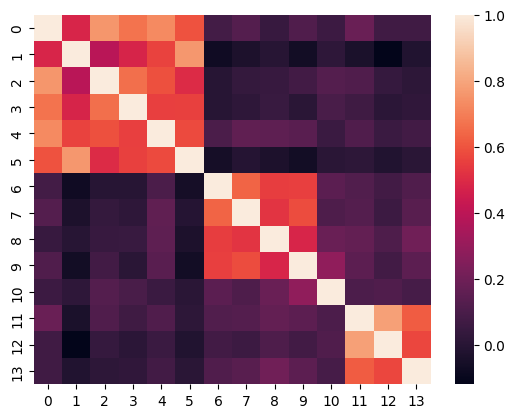

In [ ]:
# Compute embeddings for all sentences
embeddings = model.encode(sentences, convert_to_tensor=True)

# Calculate the pair-wise cosine similarities between all sentences
pairwise_similarities = util.pytorch_cos_sim(embeddings, embeddings)

sns.heatmap(pairwise_similarities)

# It works much better than Bert, both using this euclidian distance among the embeddings and the sin cos distance

<Axes: >

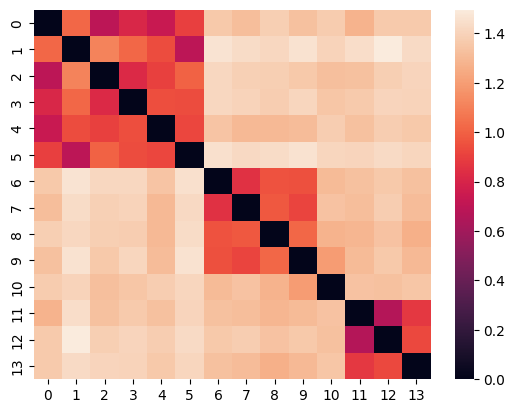

In [ ]:
array_similarity = squareform(pdist(embeddings, metric='euclidean'))
sns.heatmap(array_similarity)

# It works much better than Bert, both using this euclidian distance among the embeddings and the sin cos distance

### ROBERTA

In [ ]:
pip install -U sentence-transformers

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
from sentence_transformers import util
import torch

# Load pre-trained model
model = RobertaModel.from_pretrained('roberta-base')

# Load pre-trained model tokenizer (vocabulary)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Esempio Base

In [ ]:
# Encode text
text = "Here is some text to encode"  # Replace this with your text
encoded_input = tokenizer(text, return_tensors='pt') # tokenizer.encode(text, add_special_tokens = True, return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[    0, 11773,    16,   103,  2788,     7, 46855,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
# original sentence
print(' Original: ', text)
# Sentence split into tokens
print('Tokenized: ', tokenizer.tokenize(text))
# Print the sentence mapped to token ids
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text)))

 Original:  Here is some text to encode
Tokenized:  ['Here', 'Ġis', 'Ġsome', 'Ġtext', 'Ġto', 'Ġencode']
Token IDs:  [11773, 16, 103, 2788, 7, 46855]


In [ ]:
# Forward pass, get hidden states
with torch.no_grad():
    outputs = model(**encoded_input)

# The last hidden-state is the first element of the output tuple
lhs_tensor = outputs.last_hidden_state
print(lhs_tensor.size())
cls_tensor = lhs_tensor[:, 0, :]
cls_tensor.shape

torch.Size([1, 8, 768])


torch.Size([1, 768])

COS SIMILARITY DI 2 FRASI

In [ ]:
# Sentences we want sentence embeddings for
sentence1 = "This is an art piece by Picasso."
sentence2 = "That artwork was created by a Spanish artist."

# Roberta has no .encode
encoded1 = tokenizer(sentence1, return_tensors='pt') # same as tokenizer.encode(sentence1, add_special_tokens = True, return_tensors='pt')
encoded2 = tokenizer(sentence2, return_tensors='pt')
with torch.no_grad():
    output1 = model(**encoded1)
    output2 = model(**encoded2)

# The last hidden-state is the first element of the output tuple
last_hidden_states1 = output1.last_hidden_state
last_hidden_states2 = output2.last_hidden_state
cls_tensor1 = last_hidden_states1[:, 0, :]
cls_tensor2 = last_hidden_states2[:, 0, :]
cls_tensor1.shape, cls_tensor2.shape

(torch.Size([1, 768]), torch.Size([1, 768]))

In [ ]:
# Compute cosine similarity
cosine_similarity = util.pytorch_cos_sim(cls_tensor1, cls_tensor2)

print("Cosine similarity:", cosine_similarity.item())

Cosine similarity: 0.998756468296051


PARAGRAFI

In [ ]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add `[CLS]` and `[SEP]`
                        max_length = max_len,      # Pad & truncate all sentences.
                        pad_to_max_length = True,  # Pad sentence to max_length
                        return_attention_mask = True,   # Construct attention masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # Add its attention mask (simply differenciates padding from non-padding)
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors
inputs_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Print sentence 0, now as a list of IDs
print('Original first sentence: \n', sentences[0])
print('\nToken IDs view:', input_ids[0])

Original first sentence: 
 In economics, inflation is a general increase in the prices of goods and services in an economy.

Token IDs view: tensor([[    0,  1121, 10492,     6,  2680,    16,    10,   937,   712,    11,
             5,   850,     9,  3057,     8,   518,    11,    41,   866,     4,
             2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1]])


In [ ]:
with torch.no_grad():
    output = model(inputs_ids, attention_mask = attention_masks)

In [ ]:
# sentence_features = output[0][:,0,:].detach().numpy()
# remember: output[0] is last hidden state of encoder stack
# alternative output.last_hidden_state

my_last_hidden_ROBERTA_states = output.last_hidden_state
print(my_last_hidden_ROBERTA_states.size())
CLS_embedded_token_of_each_sentence = my_last_hidden_ROBERTA_states[:,0,:]
CLS_embedded_token_of_each_sentence.size()
# [all sentences, 0 = CLS token only, all hidden outputs]

torch.Size([14, 69, 768])


torch.Size([14, 768])

In [ ]:
CLS_embedded_token_of_each_sentence_nparray = CLS_embedded_token_of_each_sentence.detach().numpy()
np.shape(CLS_embedded_token_of_each_sentence_nparray)

(14, 768)

<Axes: >

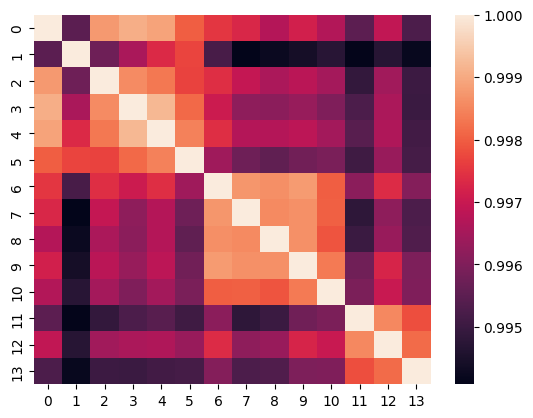

In [ ]:
# Calculate the pair-wise cosine similarities between all sentences
pairwise_similarities = util.pytorch_cos_sim(CLS_embedded_token_of_each_sentence_nparray, CLS_embedded_token_of_each_sentence_nparray)

sns.heatmap(pairwise_similarities)

Text(0.5, 1.0, 'visualizing sentence semantic similarity')

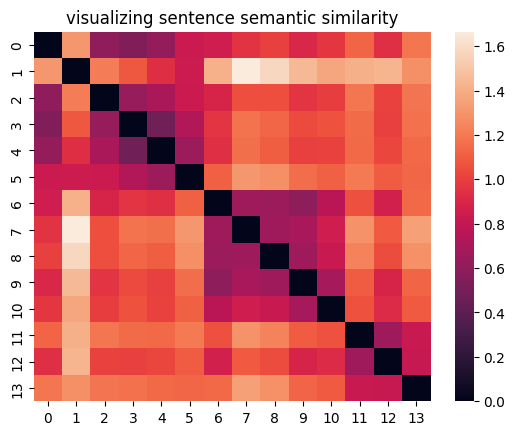

In [ ]:
array_similarity = squareform(pdist(CLS_embedded_token_of_each_sentence_nparray, metric='euclidean'))
sns.heatmap(array_similarity)
plt.title('visualizing sentence semantic similarity')

In [ ]:
from transformers import AutoTokenizer

model1 = SentenceTransformer('all-MiniLM-L6-v2') # MAX LENGTH = 256
model2 = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2') # MAX LENGTH = 128

tokenizer1 = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
tokenizer2 = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

drum1 =  "The drum is a member of the percussion group of musical instruments. In the Hornbostel-Sachs classification system, it is a membranophone. Drums consist of at least one membrane, called a drumhead or drum skin, that is stretched over a shell and struck, either directly with the player's hands, or with a percussion mallet, to produce sound. There is usually a resonant head on the underside of the drum. Other techniques have been used to cause drums to make sound, such as the thumb roll. Drums are the world's oldest and most ubiquitous musical instruments, and the basic design has remained virtually unchanged for thousands of years. Drums may be played individually, with the player using a single drum, and some drums such as the djembe are almost always played in this way. Others are normally played in a set of two or more, all played by one player, such as bongo drums and timpani. A number of different drums together with cymbals form the basic modern drum kit."
drum2 ="Drums are usually played by striking with the hand, a beater attached to a pedal, or with one or two sticks with or without padding. A wide variety of sticks are used, including wooden sticks and sticks with soft beaters of felt on the end. In jazz, some drummers use brushes for a smoother, quieter sound. In many traditional cultures, drums have a symbolic function and are used in religious ceremonies. Drums are often used in music therapy, especially hand drums, because of their tactile nature and easy use by a wide variety of people. In the 2000s, drums have also been used as a way to engage in aerobic exercise and is called cardio drumming. In popular music and jazz, drums usually refers to a drum kit or a set of drums (with some cymbals, or in the case of harder rock music genres, many cymbals), and drummer to the person who plays them. Drums acquired even divine status in places such as Burundi, where the karyenda was a symbol of the power of the king."
drum3 = "The shell almost always has a circular opening over which the drumhead is stretched, but the shape of the remainder of the shell varies widely. In the Western musical tradition, the most usual shape is a cylinder, although timpani, for example, use bowl-shaped shells. Other shapes include a frame design (tar, Bodhrán), truncated cones (bongo drums, Ashiko), goblet shaped (djembe), and joined truncated cones (talking drum). A drum contains cylindrical shells can be open at one end (as is the case with timbales), or can have two drum heads, one head on each end. Single-headed drums typically consist of a skin stretched over an enclosed space, or over one of the ends of a hollow vessel. Drums with two heads covering both ends of a cylindrical shell often have a small hole somewhat halfway between the two heads; the shell forms a resonating chamber for the resulting sound. Exceptions include the African slit drum, also known as a log drum as it is made from a hollowed-out tree trunk, and the Caribbean steel drum, made from a metal barrel. Drums with two heads can also have a set of wires, called snares, held across the bottom head, top head, or both heads, hence the name snare drum. On some drums with two heads, a hole or bass reflex port may be cut or installed onto one head, as with some 2010s era bass drums in rock music."
med1 = "Medicine is the science and practice of caring for a patient, managing the diagnosis, prognosis, prevention, treatment, palliation of their injury or disease, and promoting their health. Medicine encompasses a variety of health care practices evolved to maintain and restore health by the prevention and treatment of illness. Contemporary medicine applies biomedical sciences, biomedical research, genetics, and medical technology to diagnose, treat, and prevent injury and disease, typically through pharmaceuticals or surgery, but also through therapies as diverse as psychotherapy, external splints and traction, medical devices, biologics, and ionizing radiation, amongst others."
med2 = "Medicine has been practiced since prehistoric times, and for most of this time it was an art (an area of creativity and skill), frequently having connections to the religious and philosophical beliefs of local culture. For example, a medicine man would apply herbs and say prayers for healing, or an ancient philosopher and physician would apply bloodletting according to the theories of humorism. In recent centuries, since the advent of modern science, most medicine has become a combination of art and science (both basic and applied, under the umbrella of medical science). For example, while stitching technique for sutures is an art learned through practice, knowledge of what happens at the cellular and molecular level in the tissues being stitched arises through science."
med3 = "Medical availability and clinical practice vary across the world due to regional differences in culture and technology. Modern scientific medicine is highly developed in the Western world, while in developing countries such as parts of Africa or Asia, the population may rely more heavily on traditional medicine with limited evidence and efficacy and no required formal training for practitioners. In the developed world, evidence-based medicine is not universally used in clinical practice; for example, a 2007 survey of literature reviews found that about 49% of the interventions lacked sufficient evidence to support either benefit or harm."
cinema1 = "A film – also called a movie, motion picture, moving picture, picture, photoplay or (slang) flick – is a work of visual art that simulates experiences and otherwise communicates ideas, stories, perceptions, feelings, beauty, or atmosphere through the use of moving images. These images are generally accompanied by sound and, more rarely, other sensory stimulations.[1] The word cinema, short for cinematography, is often used to refer to filmmaking and the film industry, and the art form that is the result of it."
cinema2 = "The moving images of a film are created by photographing actual scenes with a motion-picture camera, by photographing drawings or miniature models using traditional animation techniques, by means of CGI and computer animation, or by a combination of some or all of these techniques, and other visual effects. Before the introduction of digital production, a series of still images were recorded on a strip of chemically sensitized celluloid (photographic film stock), usually at a rate of 24 frames per second. The images are transmitted through a movie projector at the same rate as they were recorded, with a Geneva drive ensuring that each frame remains still during its short projection time. A rotating shutter causes stroboscopic intervals of darkness, but the viewer does not notice the interruptions due to flicker fusion. The apparent motion on the screen is the result of the fact that the visual sense cannot discern the individual images at high speeds, so the impressions of the images blend with the dark intervals and are thus linked together to produce the illusion of one moving image. An analogous optical soundtrack (a graphic recording of the spoken words, music and other sounds) runs along a portion of the film exclusively reserved for it, and was not projected."
cinema3 = "The name film originally referred to the thin layer of photochemical emulsion on the celluloid strip that used to be the actual medium for recording and displaying motion pictures. Many other terms exist for an individual motion-picture, including picture, picture show, moving picture, photoplay, and flick. The most common term in the United States is movie, while in Europe, film is preferred. Archaic terms include animated pictures and animated photography. Flick is, in general a slang term, first recorded in 1926. It originates in the verb flicker, owing to the flickering appearance of early films. Common terms for the field, in general, include the big screen, the silver screen, the movies, and cinema; the last of these is commonly used, as an overarching term, in scholarly texts and critical essays. In the early years, the word sheet was sometimes used instead of screen."
drum1_sentences = sent_tokenize(drum1)
drum2_sentences = sent_tokenize(drum2)
drum3_sentences = sent_tokenize(drum3)
med1_sentences = sent_tokenize(med1)
med2_sentences = sent_tokenize(med2)
med3_sentences = sent_tokenize(med3)
cinema1_sentences = sent_tokenize(cinema1)
cinema2_sentences = sent_tokenize(cinema2)
cinema3_sentences = sent_tokenize(cinema3)
with torch.no_grad():
  emb_dr1 = model1.encode(drum1, convert_to_tensor=True)
  emb_dr2 = model1.encode(drum2, convert_to_tensor=True)
  emb_dr3 = model1.encode(drum3, convert_to_tensor=True)
  emb_sent_dr1 = model1.encode(drum1_sentences, convert_to_tensor=True)
  emb_sent_dr2 = model1.encode(drum2_sentences, convert_to_tensor=True)
  emb_sent_dr3 = model1.encode(drum3_sentences, convert_to_tensor=True)
  emb_med1 = model1.encode(med1, convert_to_tensor=True)
  emb_med2 = model1.encode(med2, convert_to_tensor=True)
  emb_med3 = model1.encode(med3, convert_to_tensor=True)
  emb_sent_med1 = model1.encode(med1_sentences, convert_to_tensor=True)
  emb_sent_med2 = model1.encode(med2_sentences, convert_to_tensor=True)
  emb_sent_med3 = model1.encode(med3_sentences, convert_to_tensor=True)
  emb_cinema1 = model1.encode(cinema1, convert_to_tensor=True)
  emb_cinema2 = model1.encode(cinema2, convert_to_tensor=True)
  emb_cinema3 = model1.encode(cinema3, convert_to_tensor=True)
  emb_sent_cinema1 = model1.encode(cinema1_sentences, convert_to_tensor=True)
  emb_sent_cinema2 = model1.encode(cinema2_sentences, convert_to_tensor=True)
  emb_sent_cinema3 = model1.encode(cinema3_sentences, convert_to_tensor=True)
emb_dr1_2 = torch.mean(emb_sent_dr1, dim=0)
emb_dr2_2 = torch.mean(emb_sent_dr2, dim=0)
emb_dr3_2 = torch.mean(emb_sent_dr3, dim=0)
emb_med1_2 = torch.mean(emb_sent_med1, dim=0)
emb_med2_2 = torch.mean(emb_sent_med2, dim=0)
emb_med3_2 = torch.mean(emb_sent_med3, dim=0)
emb_cinema1_2 = torch.mean(emb_sent_cinema1, dim=0)
emb_cinema2_2 = torch.mean(emb_sent_cinema2, dim=0)
emb_cinema3_2 = torch.mean(emb_sent_cinema3, dim=0)
emb1 = torch.stack((emb_dr1, emb_dr2, emb_dr3, emb_med1, emb_med2, emb_med3, emb_cinema1, emb_cinema2, emb_cinema3), dim=0)
emb2 = torch.stack((emb_dr1_2, emb_dr2_2, emb_dr3_2, emb_med1_2, emb_med2_2, emb_med3_2, emb_cinema1_2, emb_cinema2_2, emb_cinema3_2))
pairwise_similarities1 = util.pytorch_cos_sim(emb1, emb1)
pairwise_similarities2 = util.pytorch_cos_sim(emb2, emb2)

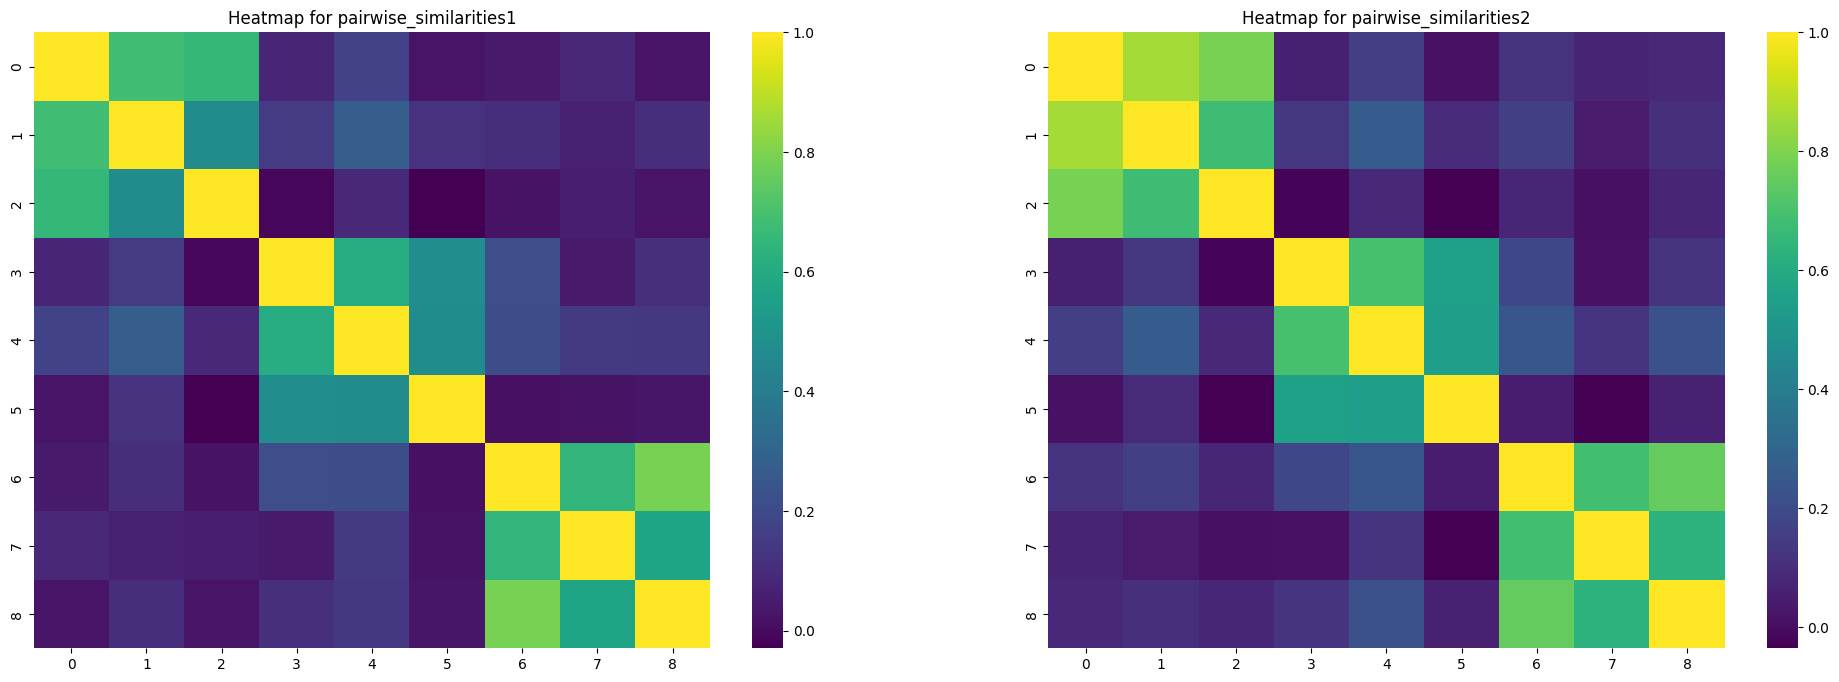

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
# Heatmap for pairwise_similarities1
sns.heatmap(pairwise_similarities1, ax=ax[0], cmap='viridis')
ax[0].set_title('Heatmap for pairwise_similarities1')

# Heatmap for pairwise_similarities2
sns.heatmap(pairwise_similarities2, ax=ax[1], cmap='viridis')
ax[1].set_title('Heatmap for pairwise_similarities2')

plt.show()